# Quantium’s retail analytics

## 1. Defining the Question

The Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behavior within the region. The insights from this analysis will be fed into the supermarket’s strategic plan for the chip category in the next half year.

### a) Main Tasks

* Examining transaction data – looking for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If we determine any anomalies, we make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis. 

* Examining customer data – check for similar issues in the customer data, looking for nulls and merging the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

* Data analysis and customer segments – making sure we define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report. 

* Deep dive into customer segments – defining the recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis. 

### b) Data Relevance

The dataset for this project has been provided independently as xlsx and csv file formats. They are attached on the repository.
    * QVI_transaction_data.xlsx - Dataset containing the transaction data
    * QVI_purchase_behaviour.csv - Dataset containing the customer behavior data

## 2. Reading the Data

In [157]:
# importing the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import xlrd
import calendar
import matplotlib.dates as mdates


In [158]:
# reading the data

transaction = pd.read_excel('QVI_transaction_data.xlsx')
behaviour = pd.read_csv('QVI_purchase_behaviour.csv')

## 3. Assessing the Data

In [159]:
# Checking the top of each dataset

# transaction

transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [160]:
# behaviour

behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [161]:
# Checking the columns

print(transaction.columns)
print(behaviour.columns)

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')
Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')


In [162]:
# Describing the data

print(transaction.describe())
print(behaviour.describe())

                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.400000  
75%        85.00

In [163]:
# Checking the shape

print(transaction.shape)
print(behaviour.shape)

(264836, 8)
(72637, 3)


The transaction dataset has 264836 rows and 8 columns while behaviour has 72637 rows and 3 columns.

In [164]:
# Before cleaning the data, we shall merge the two datasets

df = transaction.merge(behaviour, how='inner', left_on='LYLTY_CARD_NBR',right_on='LYLTY_CARD_NBR')

# Previewing the new dataset

df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


## 4. Data Cleaning

We shall first create a copy of the dataset that we shall us in cleaning.

In [165]:
df_copy = df.copy()

### a). Checking for Null Values

In [166]:
total = df_copy.isnull().sum().sort_values(ascending=False)
percentage = (df_copy.isnull().sum()/df_copy.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
missing_value.head(10)

,Total,Percentage
DATE,0,0.0
STORE_NBR,0,0.0
LYLTY_CARD_NBR,0,0.0
TXN_ID,0,0.0
PROD_NBR,0,0.0
PROD_NAME,0,0.0
PROD_QTY,0,0.0
TOT_SALES,0,0.0
LIFESTAGE,0,0.0
PREMIUM_CUSTOMER,0,0.0


We can clearly see that there are no null values

### b). Checking for Duplicates

In [167]:
df_copy.duplicated().sum()

1

There is only one duplicate value and we we shall drop it to avoid incontinency.

In [168]:
df_copy.drop_duplicates(keep='first',inplace=True)

In [169]:
# Checking to confirm there are no more

df_copy.duplicated().sum()

0

### c). Columns Formatting

For consistency we shall make all the characters to lower case and rename the columns for easy understanding.

In [170]:
# Making the columns to lower case

df_copy.columns = df_copy.columns.str.lower()

In [171]:
# Checking the columns

df_copy.columns

Index(['date', 'store_nbr', 'lylty_card_nbr', 'txn_id', 'prod_nbr',
       'prod_name', 'prod_qty', 'tot_sales', 'lifestage', 'premium_customer'],
      dtype='object')

In [172]:
# Renaming the columns

df_copy.rename(columns = {'date':'date', 'store_nbr':'store_number', 'lylty_card_nbr':'card_number', 
                     'txn_id':'transaction_id', 'prod_nbr':'product_number','prod_name':'product_name', 
                     'prod_qty':'product_qty', 'tot_sales':'total_sales', 'lifestage':'lifestage', 
                     'premium_customer':'customer_type'}, inplace=True)

# Checking  the columns

df_copy.columns

Index(['date', 'store_number', 'card_number', 'transaction_id',
       'product_number', 'product_name', 'product_qty', 'total_sales',
       'lifestage', 'customer_type'],
      dtype='object')

### d). Checking the Datatypes

In [173]:
df_copy.dtypes

date                int64
store_number        int64
card_number         int64
transaction_id      int64
product_number      int64
product_name       object
product_qty         int64
total_sales       float64
lifestage          object
customer_type      object
dtype: object

In [174]:
# We shall first convert the date to appropriate format

python_date = []

for excel_date in df_copy.date:
    new_date = xlrd.xldate_as_datetime(excel_date, 0)
    python_date.append(new_date)
    
# Assigning to the date column    

df_copy.date = python_date

# Converting date column to datetime

df_copy['date'] = pd.to_datetime(df_copy['date'])

# Confirming the date is now in  datetime format

df_copy.dtypes

date              datetime64[ns]
store_number               int64
card_number                int64
transaction_id             int64
product_number             int64
product_name              object
product_qty                int64
total_sales              float64
lifestage                 object
customer_type             object
dtype: object

The other datatypes looks fine and we shall not be changing them

### e). Checking for Outliers

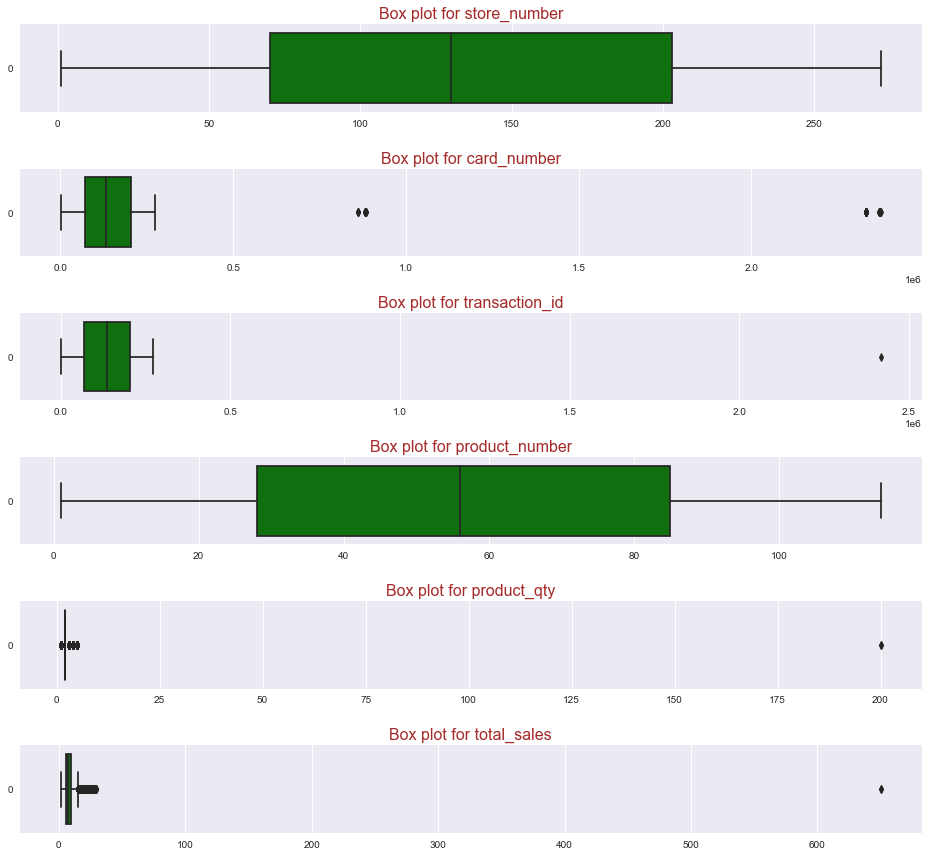

In [175]:
# Plotting Boxplot for columns with numerical values only to check for outliers

# Selecting numeric columns

num_columns = df_copy.select_dtypes(include=['number']).columns


fig, ax = plt.subplots(len(num_columns), figsize= (13,12))

for i, col_val in enumerate(num_columns):
  sns.boxplot(data = df_copy[col_val], ax= ax[i], orient="h", color = 'green')
  df_copy[col_val].value_counts()
  ax[i].set_title('Box plot for {}'.format(col_val), fontsize= 16, color='brown')
  plt.tight_layout()
plt.show()

**Based on the information that we have been given we shall not be removing outliers on the card_number and transaction_Id columns since they may be true representation of data.**

**On total_sales columns, we shall remove the extreme outliers to avoid inconsistency. This shall also remove Product_qty outliers.**

In [176]:
# We shall use Quantile method to get rid of the Outliers. We shall remove above 95% and below 5%.

max_threshold = df_copy.total_sales.quantile(0.95)
min_threshold = df_copy.total_sales.quantile(0.05)

# Removing the Higher Outliers

df_copy = df_copy[(df_copy.total_sales<max_threshold) & (df_copy.total_sales>min_threshold)]


### f). Feature Engineering

Since the manager is only interested on the Chips, we shall create another feature(column) to identify products with the name chips.

In [177]:
# Selecting the product name with the word Chips or Chp

df_copy['has_chips'] = df_copy['product_name'].str.contains('Chips|Chip|Chps|ChipCO')

df_copy.head()

,date,store_number,card_number,transaction_id,product_number,product_name,product_qty,total_sales,lifestage,customer_type,has_chips
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,True
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,False
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,True
7,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget,False
8,2018-08-06,4,4074,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,MIDAGE SINGLES/COUPLES,Budget,False


We shall also create a new feature(column) to represent the unit price.

In [178]:
df_copy['unit_price'] = (df_copy.total_sales/df_copy.product_qty)

df_copy.head()

,date,store_number,card_number,transaction_id,product_number,product_name,product_qty,total_sales,lifestage,customer_type,has_chips,unit_price
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,True,3.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,False,2.1
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,True,1.9
7,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,MIDAGE SINGLES/COUPLES,Budget,False,5.1
8,2018-08-06,4,4074,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,MIDAGE SINGLES/COUPLES,Budget,False,4.2


## 5. Storing the Dataset

In [179]:
# We shall save the final dataframe in a csv file by the name 'customer_transaction_behaviour.csv'

df_copy.to_csv('customer_transaction_behaviour.csv', index=False)

## 6. Data Analysis

In [156]:
# Import the data from the CSV

df_clean = pd.read_csv('customer_transaction_behaviour.csv')

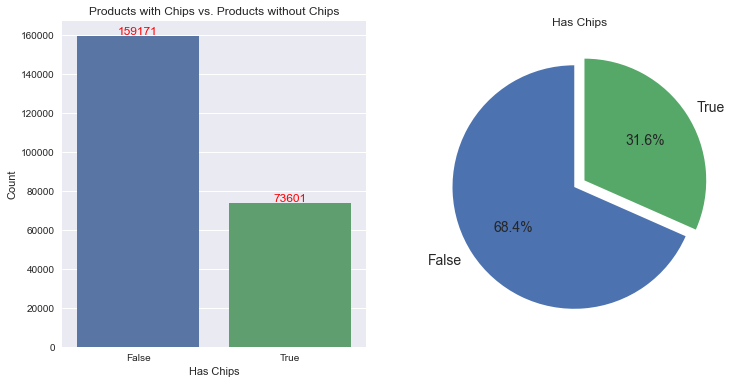

In [215]:
# The Sales of Chips as Compared to other products

# Get counts for has_chips
counts = df_clean['has_chips'].value_counts()

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Create bar chart on first subplot
colors = {True: sns.color_palette()[1], False: sns.color_palette()[0]}
sns.countplot(data=df_clean, x='has_chips', ax=ax1, palette=colors)

# Adding labels to bars
for p in ax.patches:
    ax1.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom',
                fontsize=12, color='red')

# Set labels for bar chart
ax1.set_xlabel('Has Chips')
ax1.set_ylabel('Count')
ax1.set_title('Products with Chips vs. Products without Chips', fontsize=12)

# Create pie chart on second subplot
explode = (0.05, 0.05)
ax2.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette(), explode=explode, textprops={'fontsize': 14})

# Set title for pie chart
ax2.set_title('Has Chips')

# Show plot
plt.show()

**From the above charts we can clearly see that the Products that have Chips tend to produce about a third of the total sales only.**

In [216]:
# Categorical Columns

# Selecting the categorical columns for features that are of interest

cat_col = ['product_name','lifestage','customer_type','has_chips']

categorical = df_clean[cat_col]

categorical.head()

,product_name,lifestage,customer_type,has_chips
0,Natural Chip Compny SeaSalt175g,YOUNG SINGLES/COUPLES,Premium,True
1,CCs Nacho Cheese 175g,MIDAGE SINGLES/COUPLES,Budget,False
2,WW Original Stacked Chips 160g,MIDAGE SINGLES/COUPLES,Budget,True
3,Old El Paso Salsa Dip Tomato Mild 300g,MIDAGE SINGLES/COUPLES,Budget,False
4,Tyrrells Crisps Lightly Salted 165g,MIDAGE SINGLES/COUPLES,Budget,False


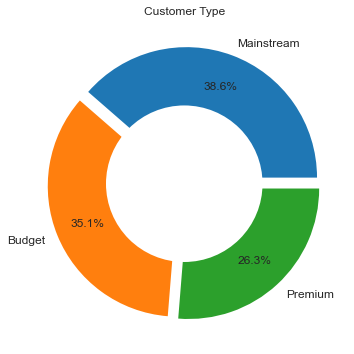

In [248]:
# Pie chart to show the customer_type 

colors = sns.color_palette('tab10')[0:5]
explode = (0.05, 0.05, 0.05)


df_clean.customer_type.value_counts().plot(kind = 'pie', autopct = '%1.1f%%', 
                                           figsize = (6, 6), colors = colors, explode = explode,
                                           pctdistance=0.75,textprops={'fontsize': 12})
plt.title('Customer Type')
plt.ylabel("")

# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.show()

**From the above donut chart we can see most customers are mostly the mainstream and the budget type. We only have 26% as Premium customers.**

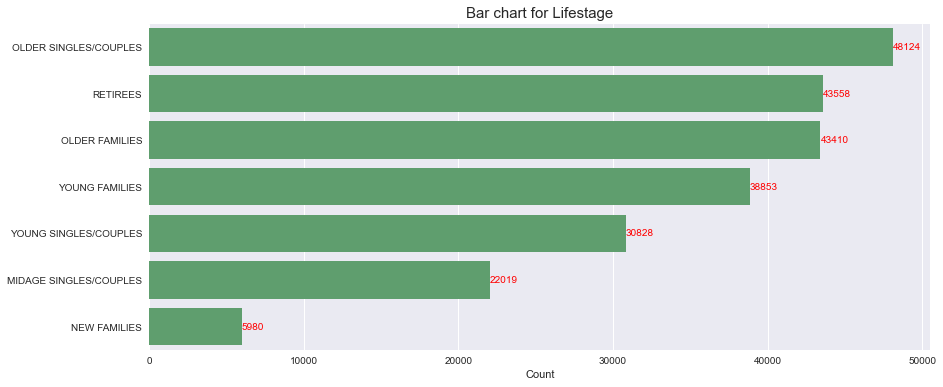

In [220]:
# Bar chart to show the lifestage

order = categorical['lifestage'].value_counts().index
counts = categorical['lifestage'].value_counts().values

plt.figure(figsize=[14, 6])
sns.countplot(data=categorical, y='lifestage', color=sns.color_palette()[1], order=order)

plt.title('Bar chart for Lifestage',fontdict={'fontsize':15})
plt.ylabel("")
plt.xlabel("Count")

# Add labels to the bars
for i, count in enumerate(counts):
    plt.annotate(str(count), xy=(count + 5, i), va='center',color='red')

plt.show()

In [221]:
# Selecting Numerical Columns

numerical_columns = df_clean.select_dtypes(include=['number'])

In [222]:
numerical_columns.columns

Index(['store_number', 'card_number', 'transaction_id', 'product_number',
       'product_qty', 'total_sales', 'unit_price'],
      dtype='object')

In [224]:
# Function to Plot Histogram

def column(x, bins='auto',binwidth=None):
    ''' This function takes in a column name and plots a histogram for the column
        Inputs: Column name
        Output: Histogram for the column   
    '''
    ax = sns.histplot(data = df_clean, x=x, kde=True, bins=bins, binwidth=binwidth, color='g')
    ax.lines[0].set_color('red')
    plt.title('Histogram for {}'.format(x), weight='bold')
    plt.xlabel('{}'.format(x));

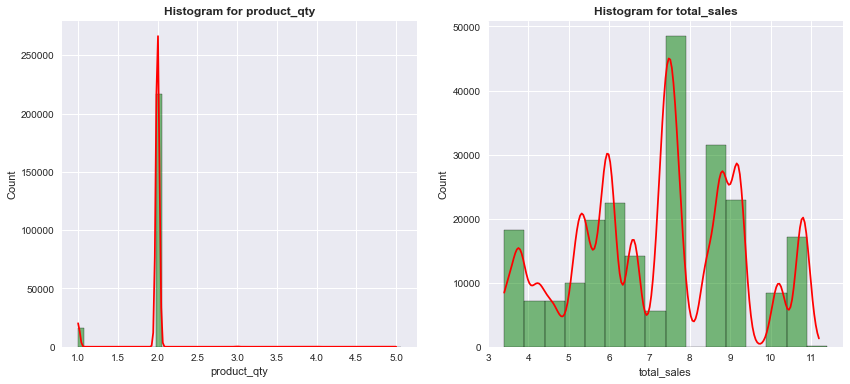

In [225]:
# Histogram for the product_qty and total_sales variables

plt.figure(figsize = [14, 6])

plt.subplot(1,2,1)
    
column('product_qty', binwidth=0.07)

plt.subplot(1,2,2)
    
column('total_sales', binwidth=.5)

### Bivariate Analysis

Text(0, 0.5, 'total_sales')

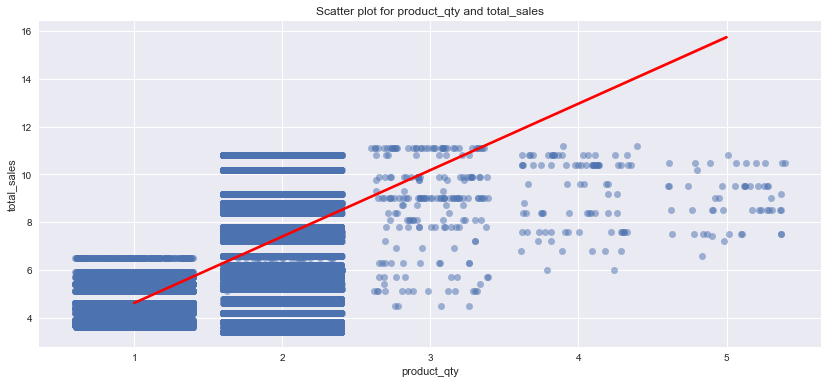

In [226]:
# Scatter plot for the product_qty and total_sales variables

plt.figure(figsize=[14, 6])


sns.regplot(data = df_clean, x = 'product_qty', y = 'total_sales', 
            line_kws={'color':'red'}, x_jitter=0.4, scatter_kws={'alpha':1/2})
plt.title('Scatter plot for product_qty and total_sales');
plt.xlabel('product_qty')
plt.ylabel('total_sales')

**As expected, with increase on the product quantity, the total sales goes up.**

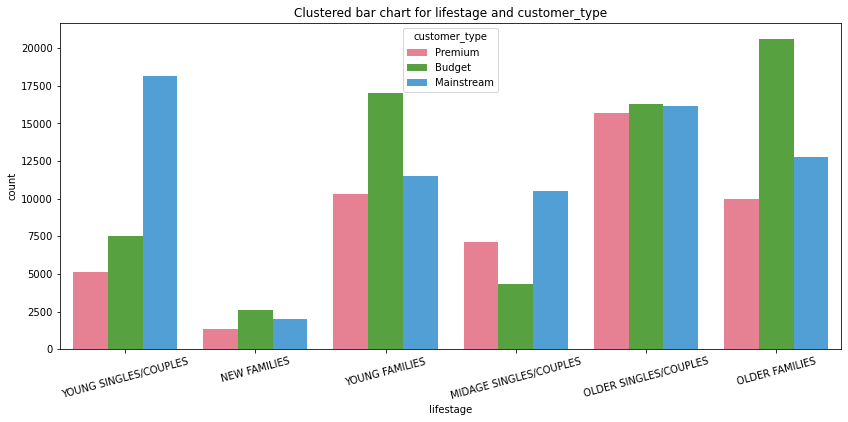

In [64]:
# Clustered bar chart for the lifestage and customer_type variables

order = ['YOUNG SINGLES/COUPLES','NEW FAMILIES','YOUNG FAMILIES',
         'MIDAGE SINGLES/COUPLES','OLDER SINGLES/COUPLES','OLDER FAMILIES'
         ]

plt.figure(figsize=[14, 6])

sns.countplot(data = df_clean, x = 'lifestage', hue = 'customer_type', palette = 'husl', order=order)
plt.xticks(rotation = 15)
plt.title('Clustered bar chart for lifestage and customer_type');

**New Families tend to spend less while Young single/couples spend most on the mainstream. Older Families tend to spend more on the budget.**

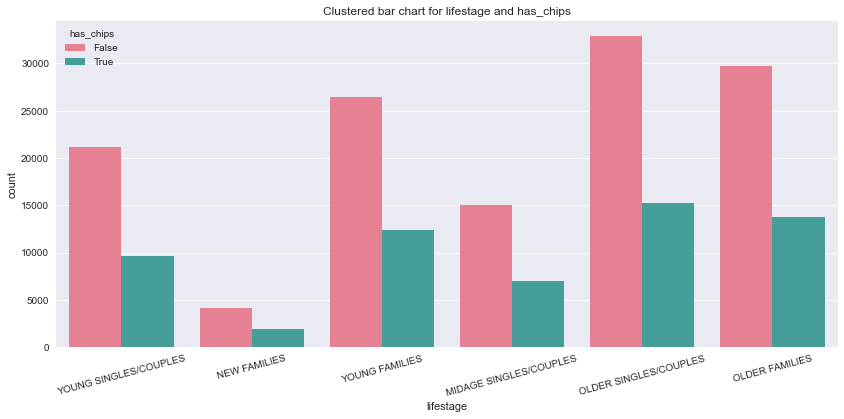

In [229]:
# Clustered bar chart for the lifestage and has_chips variables

order = ['YOUNG SINGLES/COUPLES','NEW FAMILIES','YOUNG FAMILIES',
         'MIDAGE SINGLES/COUPLES','OLDER SINGLES/COUPLES','OLDER FAMILIES'
         ]

plt.figure(figsize=[14, 6])

sns.countplot(data = df_clean, x = 'lifestage', hue = 'has_chips', palette = 'husl', order=order)
plt.xticks(rotation = 15)
plt.title('Clustered bar chart for lifestage and has_chips');

**Most age group categories do no have chips on their products. Older Singles/ Couples tend to have higher preference for the chips as compared to the other groups.**

<Figure size 1008x432 with 0 Axes>

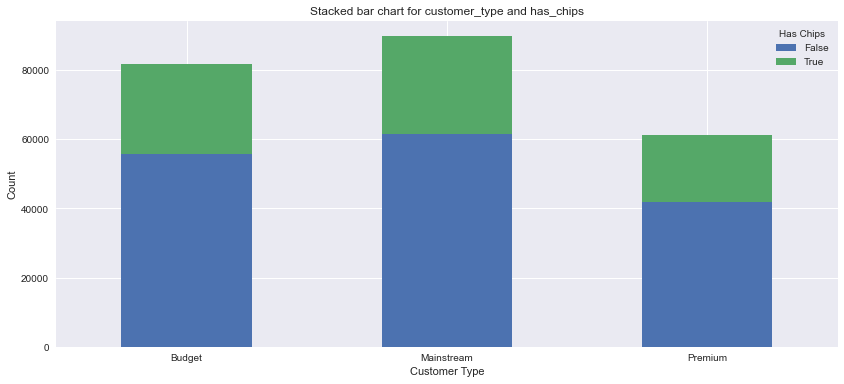

In [258]:
# Clustered bar chart for the lifestage and has_chips variables

plt.figure(figsize=[14, 6])

df_chips_by_type = df_clean.groupby(['customer_type', 'has_chips'])['transaction_id'].count().reset_index()
df_chips_by_type = df_chips_by_type.pivot(index='customer_type', columns='has_chips', values='transaction_id')

df_chips_by_type.plot(kind='bar', stacked=True, figsize=[14, 6])
plt.xticks(rotation=0)
plt.title('Stacked bar chart for customer_type and has_chips')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Has Chips', loc='upper right')
plt.show();

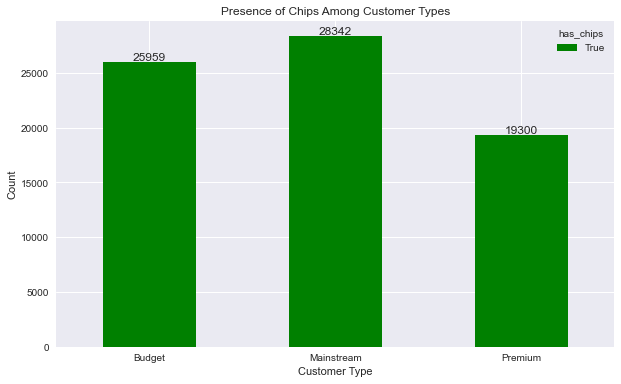

In [255]:
# Create a stacked bar chart
ax = chips_by_type.plot(kind='bar', stacked=True, figsize=[10,6], color=['green'])
plt.xticks(rotation=0)
plt.title('Presence of Chips Among Customer Types')
plt.xlabel('Customer Type')
plt.ylabel('Count')

# Add labels to the bars
for i, rect in enumerate(ax.patches):
    # Get the height of the bar
    height = rect.get_height()
    # Check if the bar represents a positive count
    if height > 0:
        # Calculate the position for the label
        x = rect.get_x() + rect.get_width() / 2
        y = height + 5
        # Add the label to the plot
        ax.text(x, y, str(int(height)), ha='center', va='bottom', fontsize=12)

plt.show()

**Mainstream clients are the once giving use the most sales This is on both the total sales and when the clients have chips on their products.**

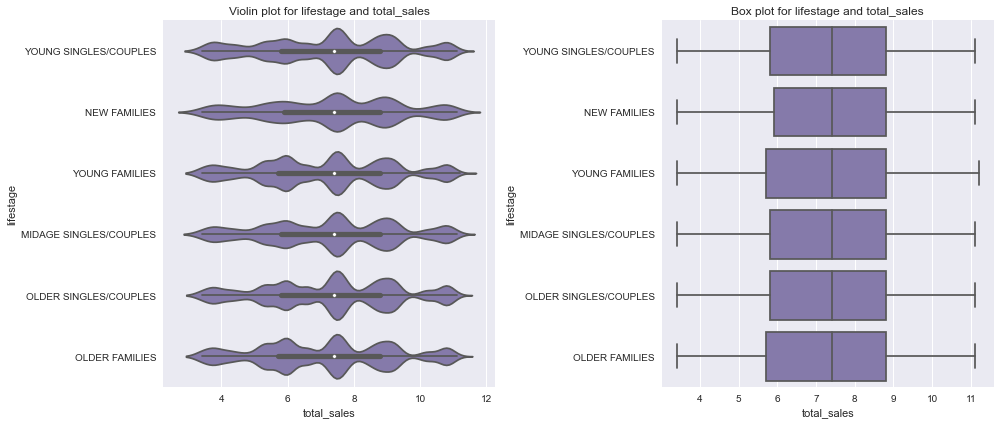

In [259]:
# Violin plot and box plot for the lifestage and total_sales variables

plt.figure(figsize=[14, 6])

plt.subplot(1, 2, 1)

sns.violinplot(data = df_clean, y = 'lifestage', x = 'total_sales', color = sns.color_palette()[3],
              order=order)
plt.title('Violin plot for lifestage and total_sales');

plt.subplot(1, 2, 2)

sns.boxplot(data = df_clean, y = 'lifestage', x = 'total_sales', color = sns.color_palette()[3],
           order=order)
plt.title('Box plot for lifestage and total_sales')
plt.tight_layout();

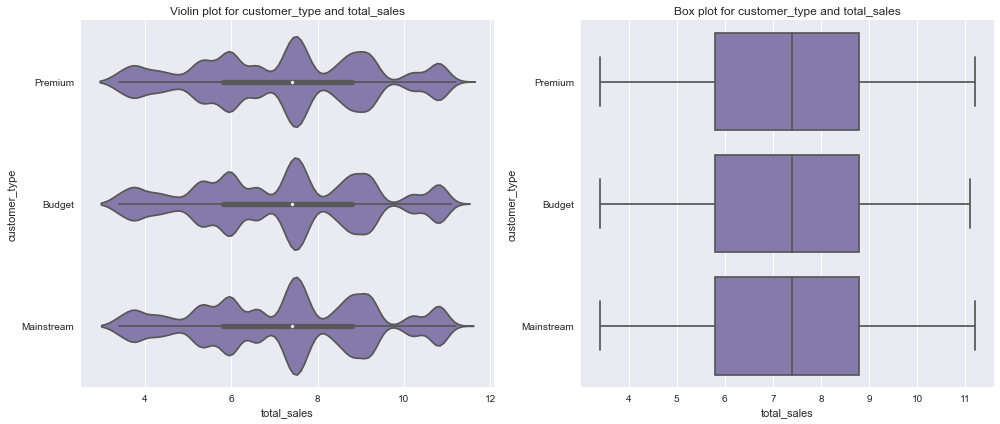

In [260]:
# Violin plot and box plot for the customer_type and total_sales variables

plt.figure(figsize=[14, 6])

plt.subplot(1, 2, 1)

sns.violinplot(data = df_clean, y = 'customer_type', x = 'total_sales', color = sns.color_palette()[3])
plt.title('Violin plot for customer_type and total_sales');

plt.subplot(1, 2, 2)

sns.boxplot(data = df_clean, y = 'customer_type', x = 'total_sales', color = sns.color_palette()[3])
plt.title('Box plot for customer_type and total_sales')
plt.tight_layout();

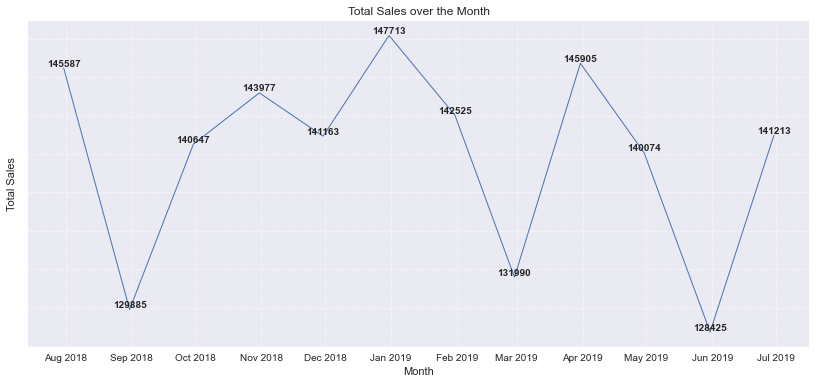

In [120]:
# Total Sales over the period

# Group the total sales by date
sales_by_date = df_clean.groupby('date')['total_sales'].sum()

# Group the total sales by month
sales_by_month = sales_by_date.resample('M').sum()

# Plot the line chart
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(sales_by_month.index, sales_by_month.values, linewidth=1)

# Add labels to the nodes
for i, value in enumerate(sales_by_month.values):
    ax.text(sales_by_month.index[i], value, int(value), ha='center', va='bottom', fontsize=10,weight='bold')

# Set the tick frequency to 1 month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Set the tick format to display month and year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set the chart title and axis labels
ax.set_title('Total Sales over the Month')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')

# Remove the y-axis tick labels
ax.set_yticklabels([])

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)

# Display the chart
plt.show()

**Total sales tend to rise in January and April, we can presume it is due to the festive period and holidays.**